In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("AirPassengers.csv",parse_dates=["Month"])

In [5]:
pip install scalecast --upgrade

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
from scalecast.Forecaster import Forecaster

In [8]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
#exploratory data analysis
f = Forecaster(
    y=df['#Passengers'],
   current_dates=df['Month']
 )

In [10]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


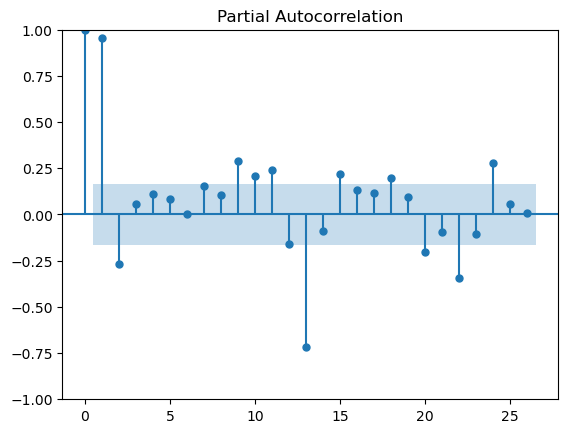

In [11]:
#pacf plot
f.plot_pacf(lags=26)
plt.show()

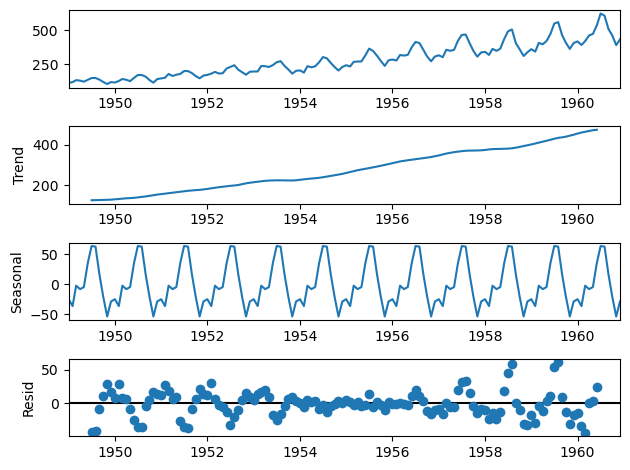

In [12]:
f.seasonal_decompose().plot()
plt.show()

In [13]:
stat,pval,_,_,_,_=f.adf_test(full_res=True)

In [14]:
stat

0.8153688792060411

In [15]:
pval

0.9918802434376409

In [16]:
#LSTM forecasting
#specify a test length
#generate future dates
#choose an estimator
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator("lstm")

5/5 [==============================] - 0s 2ms/step


C:\Users\hp\anaconda3\lib\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

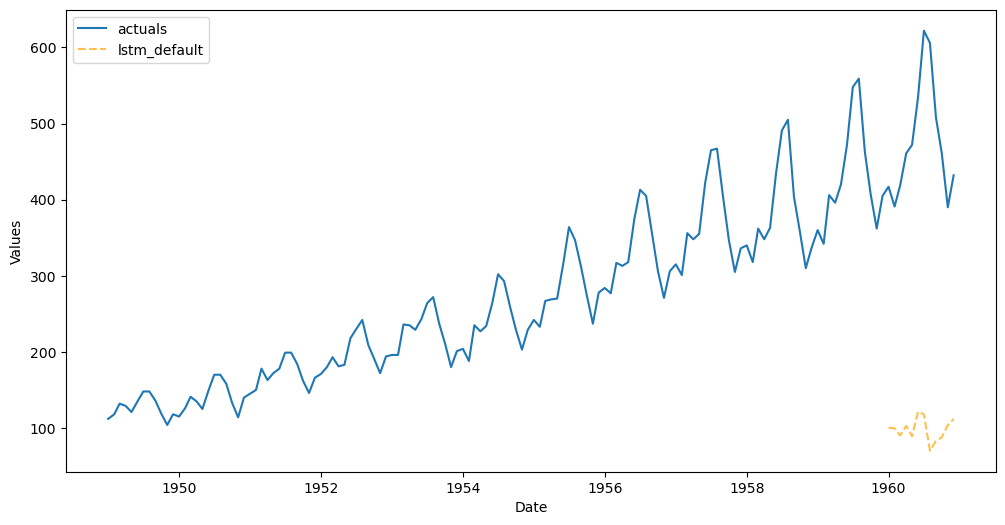

In [17]:
f.manual_forecast(call_me="lstm_default")
f.plot_test_set(ci=True)

4/4 [==============================] - 0s 4ms/step


C:\Users\hp\anaconda3\lib\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

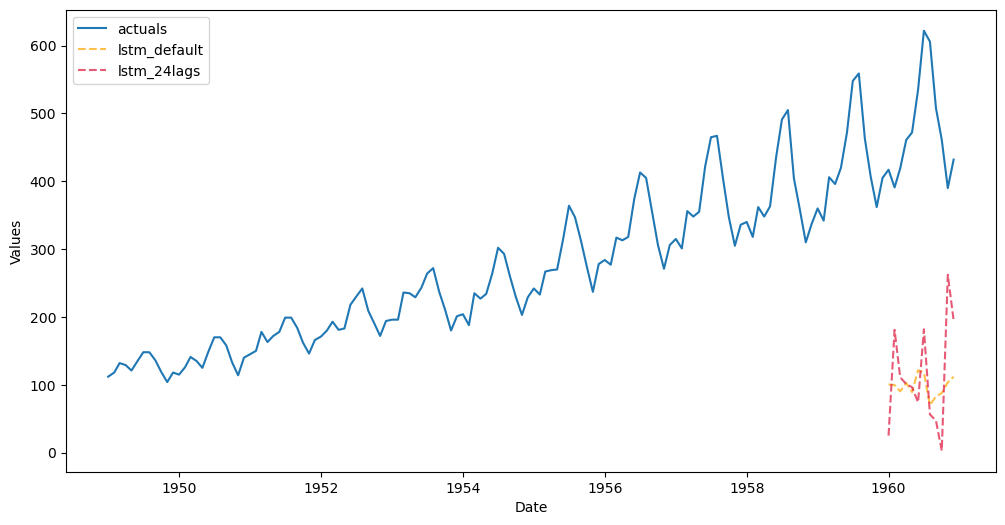

In [18]:
f.manual_forecast(call_me="lstm_24lags",lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 3s 361ms/step - loss: 0.3591 - val_loss: 0.6447
Epoch 2/5
3/3 [==============================] - 0s 32ms/step - loss: 0.3515 - val_loss: 0.6339
Epoch 3/5
3/3 [==============================] - 0s 34ms/step - loss: 0.3441 - val_loss: 0.6231
Epoch 4/5
3/3 [==============================] - 0s 33ms/step - loss: 0.3365 - val_loss: 0.6124
Epoch 5/5
1/1 [==============================] - 1s 540ms/step
Epoch 1/5
3/3 [==============================] - 3s 341ms/step - loss: 0.3149 - val_loss: 0.5855
Epoch 2/5
3/3 [==============================] - 0s 34ms/step - loss: 0.3080 - val_loss: 0.5757
Epoch 3/5
3/3 [==============================] - 0s 33ms/step - loss: 0.3010 - val_loss: 0.5657
Epoch 4/5
3/3 [==============================] - 0s 29ms/step - loss: 0.2937 - val_loss: 0.5552
Epoch 5/5
4/4 [==============================] - 0s 4ms/step


C:\Users\hp\anaconda3\lib\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_24lags_5epochs. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Values'>

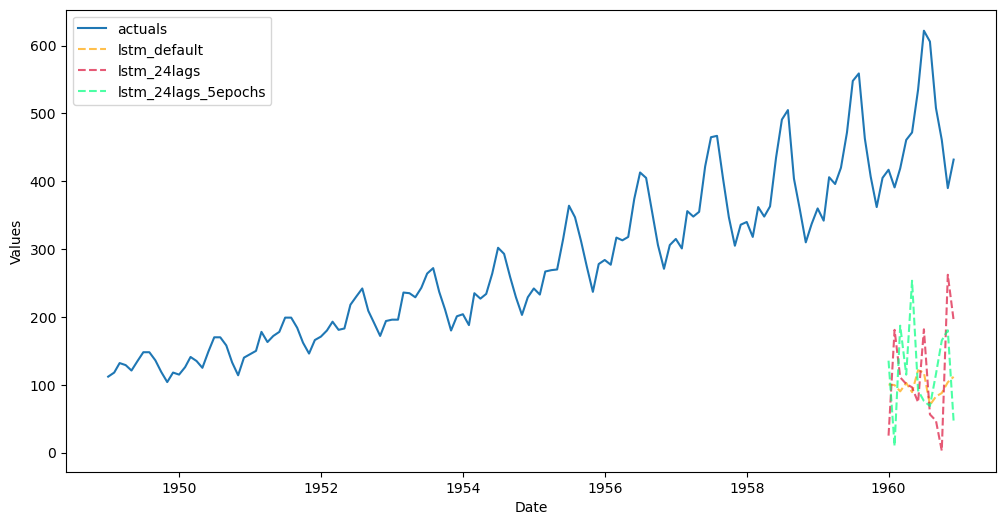

In [19]:
f.manual_forecast(
    call_me='lstm_24lags_5epochs',
    lags=24,
    epochs=5,
    validation_split=.2,
    shuffle=True,
)
f.plot_test_set(ci=True)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(
    call_me="lstm_24lags_earlystop_3layers",
    lags=24,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    callbacks=EarlyStopping(
    monitor="val_loss",
    patience=5,),
    lstm_layer_sizes=(16,16,16),
    dropout=(0,0,0),

)
f.plot_test_sec(ci=True)

Epoch 1/25
3/3 [==============================] - 9s 816ms/step - loss: 0.3515 - val_loss: 0.6258
Epoch 2/25
3/3 [==============================] - 0s 58ms/step - loss: 0.3389 - val_loss: 0.6088
Epoch 3/25
3/3 [==============================] - 0s 59ms/step - loss: 0.3253 - val_loss: 0.5889
Epoch 4/25
3/3 [==============================] - 0s 61ms/step - loss: 0.3087 - val_loss: 0.5633
Epoch 5/25
3/3 [==============================] - 0s 58ms/step - loss: 0.2872 - val_loss: 0.5278
Epoch 6/25
3/3 [==============================] - 0s 59ms/step - loss: 0.2585 - val_loss: 0.4767
Epoch 7/25
3/3 [==============================] - 0s 58ms/step - loss: 0.2236 - val_loss: 0.4065
Epoch 8/25
3/3 [==============================] - 0s 58ms/step - loss: 0.1864 - val_loss: 0.3380
Epoch 9/25
3/3 [==============================] - 0s 56ms/step - loss: 0.1636 - val_loss: 0.2806
Epoch 10/25
3/3 [==============================] - 0s 57ms/step - loss: 0.1529 - val_loss: 0.2491
Epoch 11/25
3/3 [===========

AttributeError: 'Forecaster' object has no attribute 'plot_test_sec'

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-07-13 22:13:28         3891
metadata.json                                  2023-07-13 22:13:28      

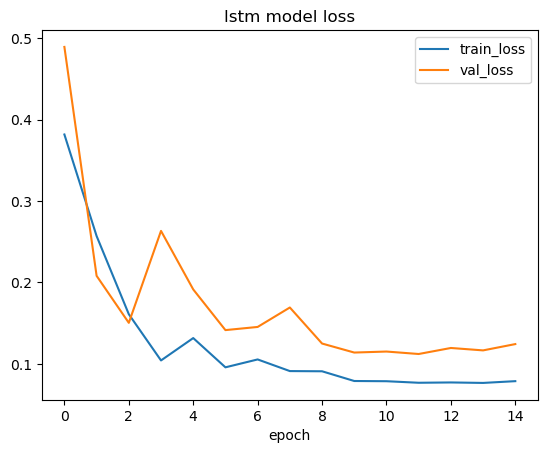

Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.3566 - val_loss: 0.5441
Epoch 2/15
3/3 [==============================] - 0s 110ms/step - loss: 0.2682 - val_loss: 0.2442
Epoch 3/15
3/3 [==============================] - 0s 122ms/step - loss: 0.1605 - val_loss: 0.1898
Epoch 4/15
3/3 [==============================] - 0s 111ms/step - loss: 0.1077 - val_loss: 0.2303
Epoch 5/15
3/3 [==============================] - 0s 116ms/step - loss: 0.0983 - val_loss: 0.1327
Epoch 6/15
3/3 [==============================] - 0s 107ms/step - loss: 0.0885 - val_loss: 0.1413
Epoch 7/15
3/3 [==============================] - 0s 106ms/step - loss: 0.0786 - val_loss: 0.1502
Epoch 8/15
3/3 [==============================] - 0s 111ms/step - loss: 0.0753 - val_loss: 0.1184
Epoch 9/15
3/3 [==============================] - 0s 117ms/step - loss: 0.0720 - val_loss: 0.1232
Epoch 10/15
3/3 [==============================] - 0s 102ms/step - loss: 0.0695 - val_loss: 0.1140
Epoch 11/15
3/3 [====

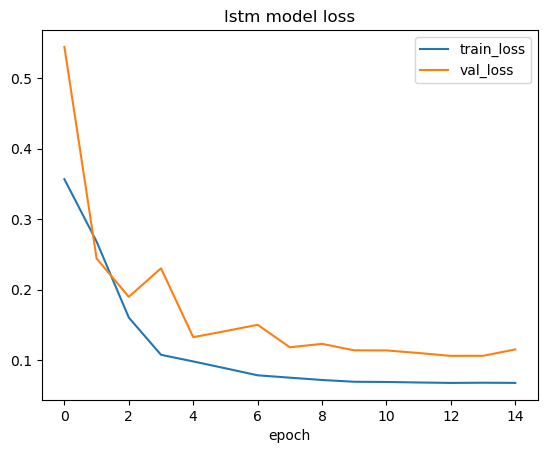

ValueError: determine_best_by must be one of ['TestSetRMSE', 'TestSetMAPE', 'TestSetMAE', 'TestSetR2', 'InSampleRMSE', 'InSampleMAPE', 'InSampleMAE', 'InSampleR2', 'ValidationMetricValue'], got LevelTestSetMAPE.

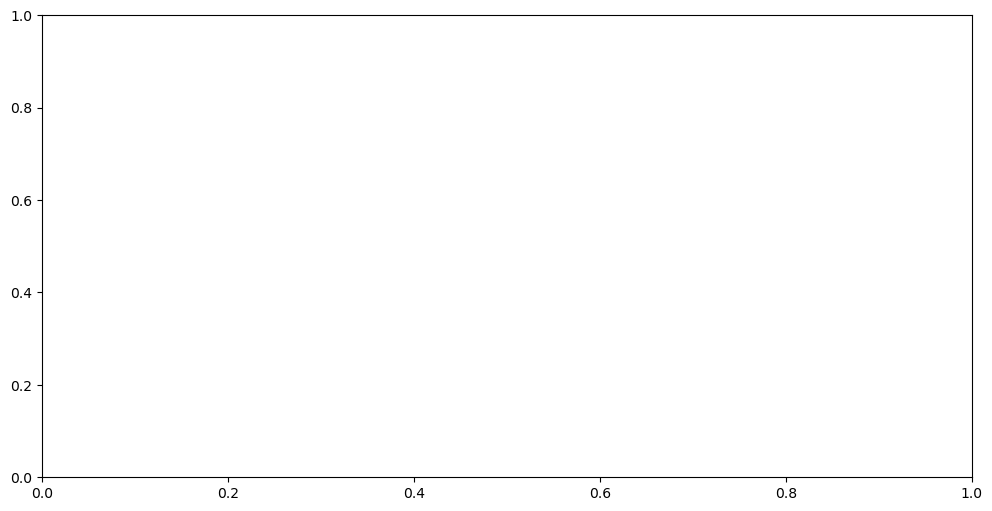

In [21]:
f.manual_forecast(
    call_me='lstm_best',
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    shuffle=True,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(72,)*4,
    dropout=(0,)*4,
    plot_loss=True
)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

In [29]:
# Import and show dataset
data = pd.read_csv("AirPassengers.csv")
print("Shape of Data: ", data.shape)
data.head()

Shape of Data:  (144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

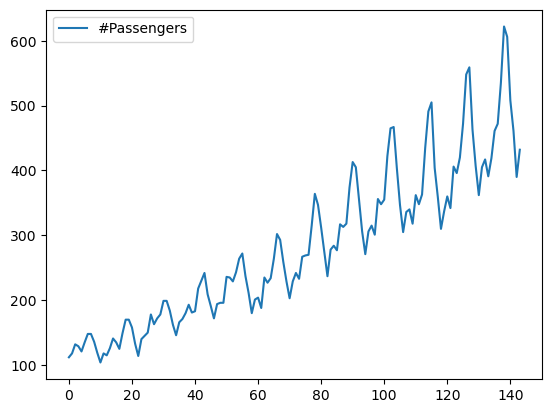

In [30]:
# Plot data
data.plot()

In [31]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [32]:
# Create a dataframe with only the number of passengers
df=data.filter(['#Passengers'])
# Convert the dataframe to a numpy array
df=df.values
print(data[:5])

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [33]:
# Scale the data to make it applicable for RNN
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)
df_scaled[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [34]:

# Split data into predictors and outcomes
# predict the number of passengers using by the past 6 months' number of passengers
X=[]
y=[]
sequence=6
for i in range(len(df_scaled) - sequence):
    X.append(df_scaled[i:(i + sequence),0]) 
    y.append(df_scaled[i + sequence,0])
X,y=np.array(X),np.array(y)
print(X)
print(y)

[[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208]
 [0.05405405 0.04826255 0.03281853 0.05984556 0.08494208 0.08494208]
 [0.04826255 0.03281853 0.05984556 0.08494208 0.08494208 0.06177606]
 [0.03281853 0.05984556 0.08494208 0.08494208 0.06177606 0.02895753]
 [0.05984556 0.08494208 0.08494208 0.06177606 0.02895753 0.        ]
 [0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703]
 [0.08494208 0.06177606 0.02895753 0.         0.02702703 0.02123552]
 [0.06177606 0.02895753 0.         0.02702703 0.02123552 0.04247104]
 [0.02895753 0.         0.02702703 0.02123552 0.04247104 0.07142857]
 [0.         0.02702703 0.02123552 0.04247104 0.07142857 0.05984556]
 [0.02702703 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054]
 [0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259]
 [0.04247104 0.07142857 0.05984556 0.04054054 0.08687259 0.12741313]
 [0.07142857 0.05984556 0.04054054

In [35]:
# Reshape the predictor 
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(138, 6, 1)

In [36]:
# Split data into training and test sets 

# Set the size of training and test data
# Use 75% of the data for training
train_size = math.ceil(len(X) * 0.75)
test_size = len(X - train_size)

# Split X and y into training and test sets
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:len(X),:]
y_test = y[train_size:len(y)]


In [37]:
# Show the size of training and test sets
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train:  (104, 6, 1)
y_train:  (104,)
X_test :  (34, 6, 1)
y_test :  (34,)


In [42]:
# Build LSTM model
lstm=Sequential()
lstm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')
lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 6, 32)             4352      
                                                                 
 lstm_29 (LSTM)              (None, 6, 32)             8320      
                                                                 
 lstm_30 (LSTM)              (None, 6, 32)             8320      
                                                                 
 lstm_31 (LSTM)              (None, 32)                8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [43]:
lstm_history = lstm.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=1)

NameError: name 'early_stop' is not defined

In [44]:
# Plot the learning history
plt.plot(lstm_history.history['loss'], label='train loss')
plt.plot(lstm_history.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.ylim([0,0.05])
plt.show()

NameError: name 'lstm_history' is not defined

In [45]:

# Build GRU model
gru=Sequential()
gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32))
gru.add(Dense(units=1))
gru.compile(optimizer='adam', loss='mean_squared_error')
gru.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6, 32)             3360      
                                                                 
 gru_1 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_2 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Set Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=40)

In [47]:
gru_history =gru.fit(X_train, y_train,batch_size=16,epochs=100,validation_split=0.2,callbacks=[early_stop],verbose=1)

Epoch 1/100
6/6 [==============================] - 12s 383ms/step - loss: 0.0297 - val_loss: 0.0507
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0146 - val_loss: 0.0236
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0091 - val_loss: 0.0655
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0107 - val_loss: 0.0732
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0092 - val_loss: 0.0404
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0082 - val_loss: 0.0252
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0075 - val_loss: 0.0331
Epoch 8/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0062 - val_loss: 0.0340
Epoch 9/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0059 - val_loss: 0.0250
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0051 - val_loss: 0.0215
Epoch 11/100
6/6 

Epoch 84/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 85/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 86/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 87/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 88/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 89/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 90/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 91/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 92/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0016 - val_loss: 0.0058
Epoch 93/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 94/1

In [48]:
# Predict with LSTM model
lstm_y_pred=lstm.predict(X_test)
lstm_y_pred=scaler.inverse_transform(lstm_y_pred)
# Predict with GRU model
gru_y_pred=gru.predict(X_test)
gru_y_pred=scaler.inverse_transform(gru_y_pred)

2/2 [==============================] - 2s 6ms/step


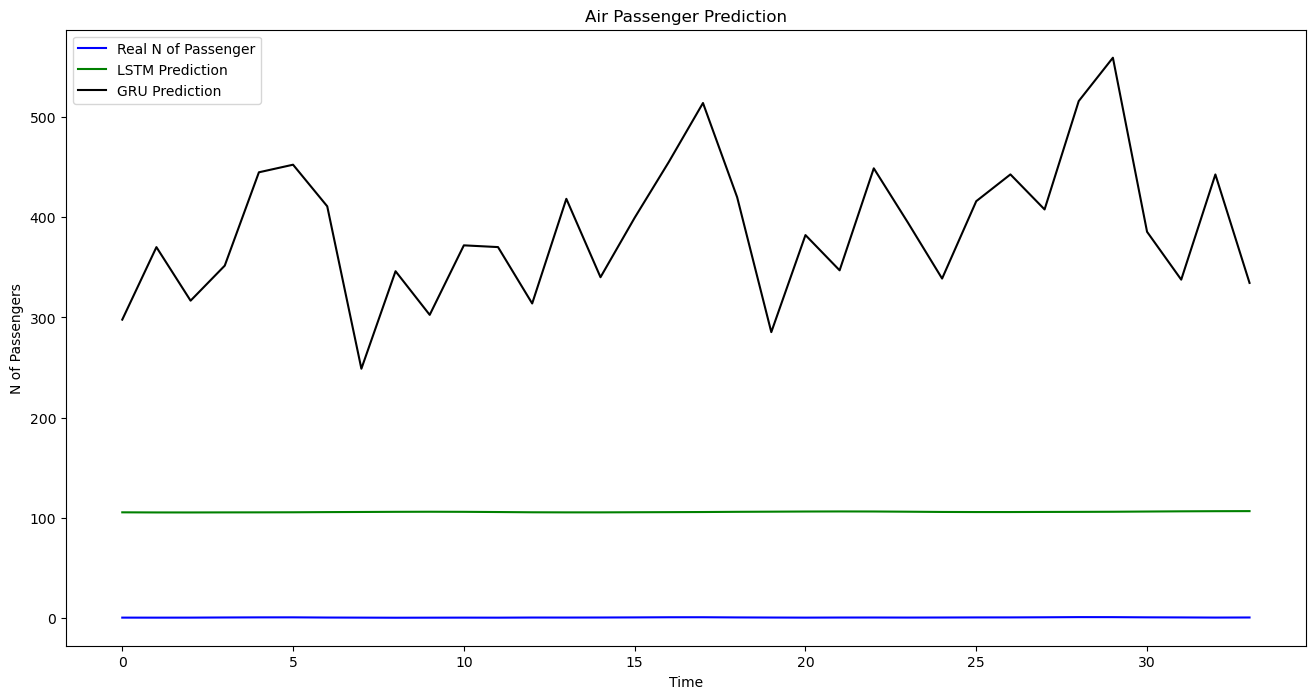

In [49]:
# Visualize the results
plt.figure(figsize=(16,8))
plt.plot(y_test, color='blue',label='Real N of Passenger')
plt.plot(lstm_y_pred, color='green', label='LSTM Prediction')
plt.plot(gru_y_pred, color='black', label='GRU Prediction')
plt.title('Air Passenger Prediction')
plt.xlabel('Time')
plt.ylabel('N of Passengers')
plt.legend()
plt.show()

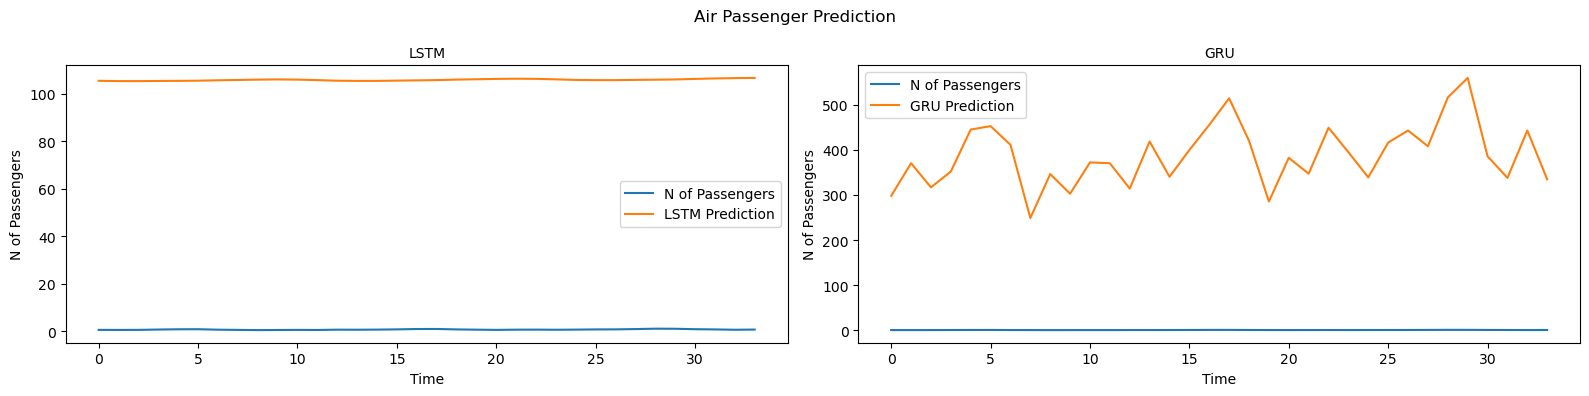

In [50]:
# Set subplot subttitles
titles = ['LSTM', 'GRU']

# Create a list of prediction models
models = [lstm_y_pred, gru_y_pred]

# Set the plot area
fig, ax = plt.subplots(1, 2, figsize=(16,4), tight_layout=True)  

# Set the title
plt.suptitle('Air Passenger Prediction')

# Create and show subplots
for i in range(0, 2):
    plt.subplot(1, 2,i+1)
    plt.title(titles[i], fontsize=10) 
    plt.plot(y_test, label='N of Passengers')
    plt.plot(models[i], label=titles[i]+' Prediction')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('N of Passengers')

In [51]:
#4)chose a dataset and apply autoencoder i)deep learning  ii)convolutional  iii)stack encoder
#i)deep learning
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [52]:
#Load our MNIST dataset.
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))

XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


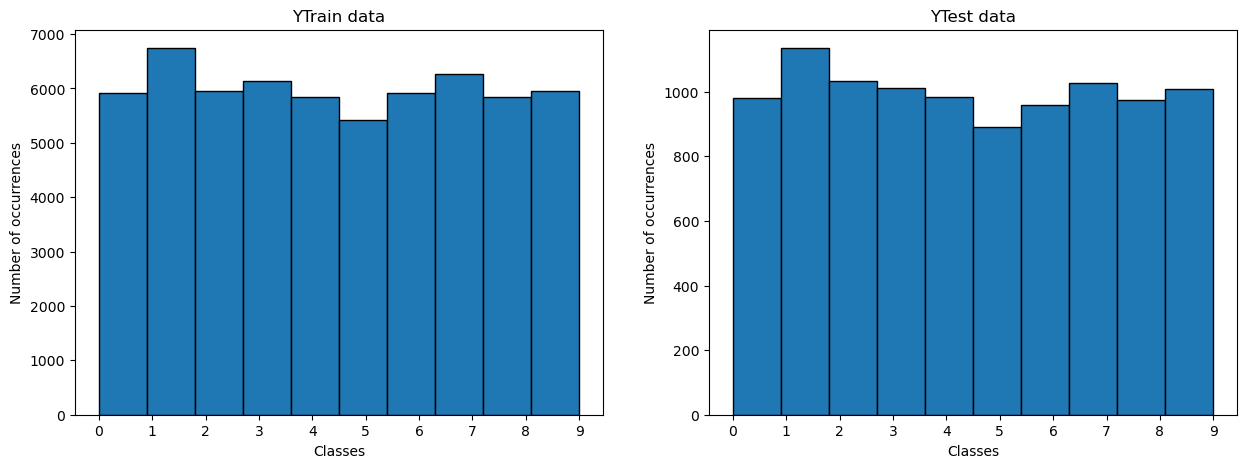

In [53]:
# we plot an histogram distribution of our test and train data.
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].hist(YTrain, ec='black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes') 
axs[0].set_ylabel('Number of occurrences')
axs[1].hist(YTest, ec='black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes') 
axs[1].set_ylabel('Number of occurrences')
# We want to show all ticks...
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))

plt.show()

In [54]:
# Data normalization.
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)

(60000, 784)
(10000, 784)


In [55]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 32)                25120     
                                                                 
 dense_15 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [56]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))
# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6927 - val_l

235/235 [==============================] - 2s 9ms/step - loss: 0.6695 - val_loss: 0.6687
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6688 - val_loss: 0.6680
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6680 - val_loss: 0.6672
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6673 - val_loss: 0.6664
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6665 - val_loss: 0.6656
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6657 - val_loss: 0.6648
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6649 - val_loss: 0.6639
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6640 - val_loss: 0.6631
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6632 - val_loss: 0.6622
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6623 - val_loss: 

dict_keys(['loss', 'val_loss'])


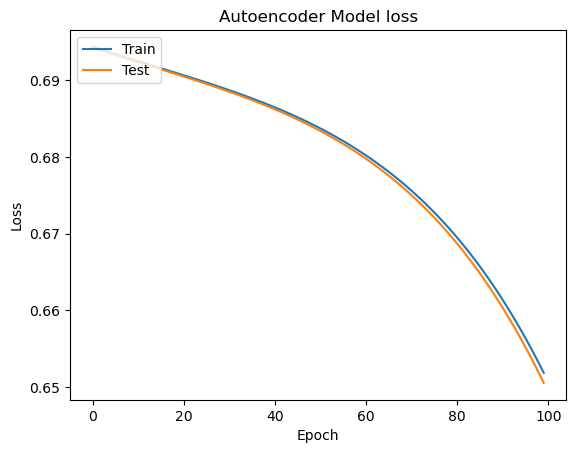

In [58]:
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

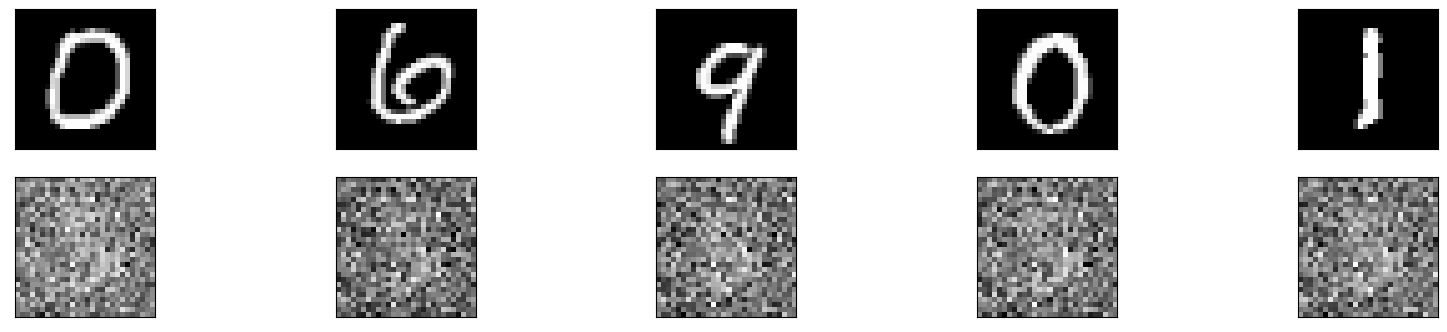

In [59]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [60]:
#ii)CNN
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [62]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255


In [63]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [64]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


In [ ]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 [==============================] - 91s 752ms/step - loss: 2.4078 - accuracy: 0.1129
Epoch 2/12
120/120 [==============================] - 89s 743ms/step - loss: 2.3931 - accuracy: 0.1130
Epoch 3/12
 36/120 [========>.....................] - ETA: 1:03 - loss: 2.3816 - accuracy: 0.1190

In [228]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 2.3118114471435547
accuracy= 0.10320000350475311


In [229]:
#iii)stacked encoder
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow
from sklearn.manifold import TSNE

In [235]:
#Download Data
digitMNIST = pd.read_csv("mnist_train.csv")
test_set, val_set = digitMNIST[5000:], digitMNIST[:5000]
val_set.shape

(5000, 785)

In [237]:
ylabels, xPics = test_set['label'], test_set.drop('label', axis=1)
yVal_labels, xVal_Pics = val_set['label'], val_set.drop('label', axis=1)
#Normalising 
xPics = xPics/255
xVal_Pics = xVal_Pics/255
#Reshaping
xPics = tf.reshape(xPics.values,[-1,28,28])
xVal_Pics = tf.reshape(xVal_Pics.values,[-1, 28, 28])

In [240]:
#Autoencoder topology  
Stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(100,activation="selu"),
    keras.layers.Dense(30,activation="selu"),
])

Stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation="selu",input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])
stacked_ae = keras.models.Sequential([Stacked_encoder,Stacked_decoder])
#Build model 
stacked_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5))

In [241]:
#Train model
history= stacked_ae.fit(xPics,xPics,epochs=30,validation_data=(xVal_Pics,xVal_Pics), verbose=0)